In [95]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using Base.Threads
using Distributions
using LsqFit

In [96]:
include("aux_functions.jl")

test_parameters (generic function with 1 method)

In [107]:
#run_name = "landau_big_8_5t100_L39.738_N2_5_J3522_M1001_o5_T3"
#(p, Energy_E, Energy_K, E_f, n_F, S_F, E_T, v_T, S_T, D_T, T) = load("Results/" * run_name * "results.jld2", "p", "Energy_E", "Energy_K", "E_f", "n_F",  "S_F", "E_T", "v_T", "S_T", "D_T", "T");

(p, Energy_E, Energy_K, E_f, n_F, S_F, E_T, v_T, S_T, D_T, T) = load("landau_big_8_5_tfinert100_L39.738_N2_5_J3522_M10001_o5_T3results.jld2", "p", "Energy_E", "Energy_K", "E_f", "n_F",  "S_F", "E_T", "v_T", "S_T", "D_T", "T");
p
length(T)

10001

In [109]:
(L, N, J, κ, dx, order) = p

exp_Theta = 3 #this can be read from run_name
exp_t = 2 #this can be read from run_name
θ = 10.0^(-exp_Theta)
t = 0.0
t_f = 10.0^(exp_t)
M = 10_001 #this can be read from run_name
M_g = 10_001 + 1 #number of outputs, starting from the initial data
dt = t_f / (M-1)
t_i = 0.0

x = [dx*(i-1) for i in 1:J] ;

println("t_f = $(t_f), M = $M, dt = $(dt), exp_Theta = $(exp_Theta)")

animation = false


t_f = 100.0, M = 10001, dt = 0.01, exp_Theta = 3


false

In [110]:
#save(run_name * "results.jld2", Dict("p" => p, "Energy_E" => Energy_E, "Energy_K" => Energy_K, "E_f" => u[2N+1:end], "n_F" => n_F, "S_F" => S_F, "E_T"=> E_T, "v_T" => v_T, "S_T" => S_T, "D_T" => D_T, "T" => T))

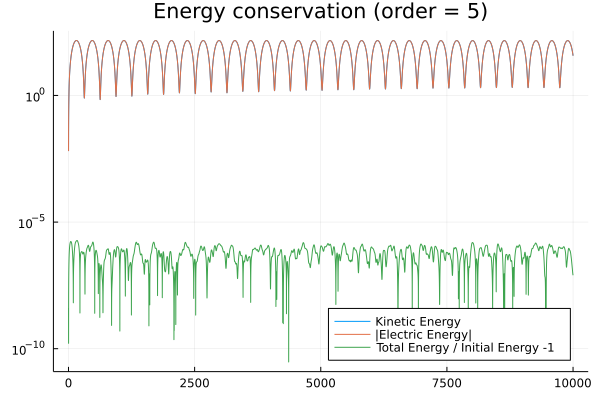

In [111]:
plot(abs.(Energy_K[2:end] .- Energy_K[1]), title = "Energy conservation (order = $(order))", label = "Kinetic Energy"
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(Energy_E[2:end] .- Energy_E[1]), label = "|Electric Energy|")
plot!(abs.(Energy_K[2:end]  + Energy_E[2:end] .- (Energy_K[1]+Energy_E[1])) ./ (Energy_K[1]+Energy_E[1]) 
, yscale=:log10
#, xscale=:log10
, label = "Total Energy / Initial Energy -1 ")
#png(run_name * "energy_conservation")

In [112]:
abs.(Energy_K[end]  + Energy_E[end] .- (Energy_K[1]+Energy_E[1])) ./ (Energy_K[1]+Energy_E[1])

7.939614972361182e-8

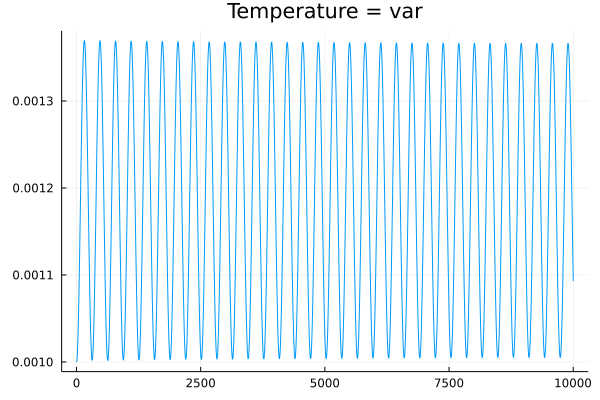

In [113]:
plot(T, label= "θ", title = "Temperature = var", legend = false)

#png(run_name * "temperature")

In [114]:
T[end]
#length(T)

0.0010929529752902684

In [118]:
t_series = [dt*(i-1)*(M-1)/(M_g-1) for i in 1:M_g-1];

In [119]:
p0 = [0.001, 0.0001, 2.0, -3.0] #, 0.0, 0.0]
@. model(x, p) = p[1] + p[2]*cos(x*p[3] + p[4]) #*cos(x*p[5] + p[6])

model (generic function with 1 method)

In [120]:
fit = curve_fit(model, t_series, T, p0);
fit.param

4-element Vector{Float64}:
  0.0011855722356566955
  0.00018172263162559424
  2.0005262927923018
 -3.141231980814765

For these parámeters the fit is:

`[0.0011855627024749266, 0.00018174169650116725, 2.0003157585811033, -3.140745365658551]`

So the frequency is **around 2** ???

For the finer resolution we get:

`[0.0011855722356566955, 0.00018172263162559424, 2.0005262927923018, -3.141231980814765]`



In [121]:
ω = fit.param[3] * sqrt(θ)

0.06326219604276562

In [132]:
2π/fit.param[3] #/ sqrt(θ)

3.140766172290402

In [122]:
cov = estimate_covar(fit)

#sqrt(Diagonal(cov))

#margin_of_error = margin_error(fit, 0.1)


#confidence_intervals = confidence_interval(fit, 0.1)

4×4 Matrix{Float64}:
  6.3009e-17   -5.36626e-19   3.17184e-16  -1.755e-14
 -5.36626e-19   1.2625e-16   -6.03819e-17   5.55236e-15
  3.17184e-16  -6.03819e-17   4.54954e-12  -2.27985e-10
 -1.755e-14     5.55236e-15  -2.27985e-10   1.5231e-8

The cov matrix is: 
  `7.07236e-15   6.57249e-17   4.22133e-14  -1.91385e-12
  6.57249e-17   1.40735e-14  -1.43341e-14   1.23887e-13
  4.22133e-14  -1.43341e-14   5.10898e-10  -2.56806e-8
 -1.91385e-12   1.23887e-13  -2.56806e-8    1.72088e-6`
 
 the finer is:
 
 `6.3009e-17   -5.36626e-19   3.17184e-16  -1.755e-14
 -5.36626e-19   1.2625e-16   -6.03819e-17   5.55236e-15
  3.17184e-16  -6.03819e-17   4.54954e-12  -2.27985e-10
 -1.755e-14     5.55236e-15  -2.27985e-10   1.5231e-8`
 
 

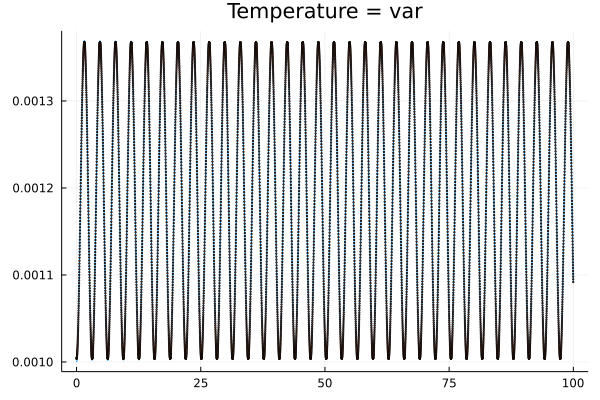

In [126]:
plot(t_series, T, label= "θ", title = "Temperature = var", legend = false)
scatter!(t_series, fit.param[1] .+ fit.param[2]*cos.(fit.param[3].*t_series .+ fit.param[4]), markersize = 1)
#plot!(t_series, sum(T)/length(T) .+ 0.00019*cos.(2.0*t_series .- 3.))

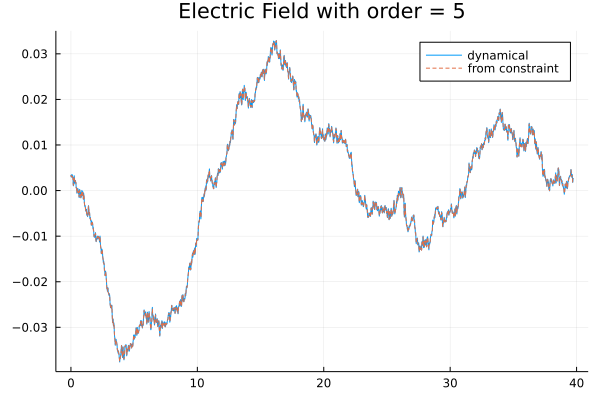

In [127]:
E_F = zeros(J)
ϕ_F = zeros(J)
#n_F = zeros(J)
#get_density!(u, n_F, p)
n0 = N/L
get_ϕ!(ϕ_F, n_F/n0 .+ 1, κ)
#get_ϕ!(ϕ_F, n_F .- n0, κ)
get_E_from_ϕ!(ϕ_F,E_F,dx)
plot(x,E_f, label = "dynamical", title="Electric Field with order = $(order)")
plot!(x,E_F,label="from constraint", ls=:dash)
#t_f = 40
#png(run_name * "E")

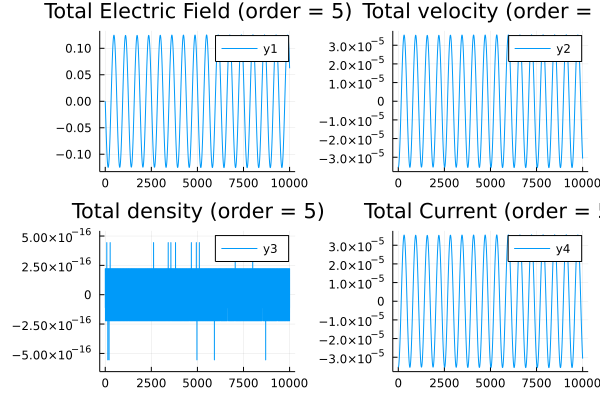

In [128]:
plot(layout=(2,2), title="order = $(order)")
plot!(subplot=1,E_T,title="Total Electric Field (order = $(order))")
plot!(subplot=2,v_T./N, title="Total velocity (order = $(order))")
plot!(subplot=3,D_T,title = "Total density (order = $(order))")
plot!(subplot=4,S_T,title = "Total Current (order = $(order))")
#png(run_name * "totals")

### Ahora chequeamos con dumping ###

In [ ]:
(p, Energy_E, Energy_K, E_f, n_F, S_F, E_T, v_T, S_T, D_T, T) = load("", "p", "Energy_E", "Energy_K", "E_f", "n_F",  "S_F", "E_T", "v_T", "S_T", "D_T", "T");
p
length(T)

In [ ]:
(L, N, J, κ, dx, order) = p

exp_Theta = 3 #this can be read from run_name
exp_t = 2 #this can be read from run_name
θ = 10.0^(-exp_Theta)
t = 0.0
t_f = 10.0^(exp_t)
M = 10_001 #this can be read from run_name
M_g = 10_001 + 1 #number of outputs, starting from the initial data
dt = t_f / (M-1)
t_i = 0.0

x = [dx*(i-1) for i in 1:J] ;

println("t_f = $(t_f), M = $M, dt = $(dt), exp_Theta = $(exp_Theta)")

animation = false



In [ ]:
plot(abs.(Energy_K[2:end] .- Energy_K[1]), title = "Energy conservation (order = $(order))", label = "Kinetic Energy"
#, legend = :outertopright
, legend = :bottomright)
plot!(abs.(Energy_E[2:end] .- Energy_E[1]), label = "|Electric Energy|")
plot!(abs.(Energy_K[2:end]  + Energy_E[2:end] .- (Energy_K[1]+Energy_E[1])) ./ (Energy_K[1]+Energy_E[1]) 
, yscale=:log10
#, xscale=:log10
, label = "Total Energy / Initial Energy -1 ")
#png(run_name * "energy_conservation")

In [ ]:
plot(T, label= "θ", title = "Temperature = var", legend = false)

In [ ]:
t_series = [dt*(i-1)*(M-1)/(M_g-1) for i in 1:M_g-1];

In [ ]:
p0 = [0.001, 0.0001, 2.0, -3.0, 0.0] #, 0.0]
@. model(x, p) = p[1] + p[2]*cos(x*p[3] + p[4])*exp(x*p[5]) #*cos(x*p[5] + p[6])

In [ ]:
fit = curve_fit(model, t_series, T, p0);
fit.param

In [ ]:
cov = estimate_covar(fit)

In [ ]:
plot(t_series, T, label= "θ", title = "Temperature = var", legend = false)
scatter!(t_series, fit.param[1] .+ fit.param[2]*cos.(fit.param[3].*t_series .+ fit.param[4])*exp(fit.param[5].*t_series), markersize = 1)


In [ ]:
E_F = zeros(J)
ϕ_F = zeros(J)
#n_F = zeros(J)
#get_density!(u, n_F, p)
n0 = N/L
get_ϕ!(ϕ_F, n_F/n0 .+ 1, κ)
#get_ϕ!(ϕ_F, n_F .- n0, κ)
get_E_from_ϕ!(ϕ_F,E_F,dx)
plot(x,E_f, label = "dynamical", title="Electric Field with order = $(order)")
plot!(x,E_F,label="from constraint", ls=:dash)
#t_f = 40
#png(run_name * "E")

In [ ]:
plot(layout=(2,2), title="order = $(order)")
plot!(subplot=1,E_T,title="Total Electric Field (order = $(order))")
plot!(subplot=2,v_T./N, title="Total velocity (order = $(order))")
plot!(subplot=3,D_T,title = "Total density (order = $(order))")
plot!(subplot=4,S_T,title = "Total Current (order = $(order))")
#png(run_name * "totals")
